# Data Analytics Spring 2023 &mdash; Exercises 3

### Onni Roivas (last modified: Mon Feb 6 at 14:25)

- Five problems + round 2 peer review
- Round 2 peer review deadline: **Mon Feb 13 at 14:00**
- Problems deadline: **Mon Feb 20 at 14:00**
- Theme: statistical plotting with matplotlib & seaborn
- **Make a copy of the original notebook** (right click & duplicate) and add your answers (new cells) there
- Remember: **no autosave** (so keep hitting that ctrl-s / cmd-s button)
- Also: see [this Teams group message](https://teams.microsoft.com/l/message/19:wpZLQbHG775XujahAR4ScrnPZGiByh6yuWgewJCHXVQ1@thread.tacv2/1675417378155?tenantId=6e9eaaf0-3ff7-4de9-8cd4-1ffbd45951b9&groupId=ba0bbd60-8a1b-42b8-84ff-6de6a3c45ab6&parentMessageId=1675417378155&teamName=Data%20Analytics%20YAMK%2C%20Spring%202023&channelName=General&createdTime=1675417378155&allowXTenantAccess=false) (greetings from Matti)
- Please make both your code and your notebook readable
- When you are done, run the handin code cell at the end of this notebook
- The original notebook may change after publication, but the
  changes should be minor
- Keep your originals up to date by running the code cell below:

In [1]:
import os
os.system('/usr/bin/bash /home/varpha/data_analytics/bin/config.sh');


Configuring...
Done.



## Round 2 peer review

**Deadline: Mon Feb 13 at 14:00**

In case you handed in your round 02 exercises, your folder **private/exrc_02/peer_review** should contain an anonymous round 02 solutions notebook of another student. In addition, some model solutions for round 02 are to be found in the folder **public/model_solutions**.

Write a few paragraphs of text (plain or markdown) into your favourite text editor and submit by running the code cell below. Please address the following issues:
 
- Are the solutions okay? Can you understand / run the code?<br/>
- What do you think about the solutions?
- How many points out of 5 do they deserve as a whole?
- How many points would you give to yourself and why?
- Any feedback or comments to Harri?

Harri will read and grade your reviews as follows:
- nonexistent or nearly so = 0p
- something written = 1-2p
- well written 3p.

When done with writing your review, please run the code cell below. It asks you to copy-paste your review text to a field that will become visible once you run the cell.


In [2]:
import sys
sys.path.append('/home/varpha/data_analytics/lib')
from handin import submit_peer_review
submit_peer_review()

Please copy-paste your peer review text below and press the Submit button:


Textarea(value='')

Button(button_style='success', description='Submit', style=ButtonStyle())

You may double check your review submission by running the following in the terminal (copy-paste & press enter):

> **cat /home/varpha/data_analytics/private/AB0410/exrc_02/peer_review/review_by_AB0410.txt**

## Problem 1. Correlation
[This file](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p01_bicycles.txt) has data on available public city bicycles in four stations in Helsinki (summer 2017). Amounts are hourly averages.

[This file](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p01_weather.csv) has hourly weather observations from Helsinki from same period.

Load both files as DataFrames and combine the DataFrames so that the corresponding hours are at the same rows.

Any hour that are in either of files should be included (the bicycle file misses some hours). Remove any overlapping columns.

Finally, give the [correlation coefficient](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) between the temperature and the number of available bicycles at the Sammonpuistikko station.

In [3]:
import pandas as pd
import numpy as np

# load the bicycle file
bikesf = 'https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p01_bicycles.txt'
bikes_df = pd.read_csv(bikesf, sep=',', header=None)
bikes_df.columns = ['Month', 'Day', 'Hour', 'Sammonpuistikko', 'Hietaniemenkatu', 'Eteläinen Hesperiankatu', 'Kesäkatu']

# load the weather file
weatherf = 'https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p01_weather.csv'
weather_df = pd.read_csv(weatherf)
# drop the row column
weather_df = weather_df.drop(['row'], axis=1)
# new column names to the df
weather_df.columns = ['Month', 'Day', 'Hour', 'clouds (1/8)', 'relative humidity (%)', 'rain intensity (mm/h)', 'air temperature (degC)']

# convert the hour from str to int
weather_df['Hour'] = weather_df['Hour'].apply(lambda x: int(x.split(':')[0]))

# concatenate the two dataframes along the rows
# fill NaNs with 0 and remove dupes
merged_df = pd.concat([bikes_df, weather_df], sort=False).fillna(0).drop_duplicates(subset=['Month', 'Day', 'Hour'])

# reset the merged df's index 
merged_df = merged_df.reset_index(drop=True)

merged_df = merged_df.drop(0) # drop the header row
merged_df['Sammonpuistikko'] = merged_df['Sammonpuistikko'].astype(float) # column from str to float
correlation = np.corrcoef(merged_df['Sammonpuistikko'], merged_df['air temperature (degC)'])
print('correlation coefficient:', correlation[0, 1])

correlation coefficient: -0.5813610202387598


## Problem 2. Plot formatting
Below is a code snippet that outputs a chart. Add code that modifies the chart to appear like below.
![this](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p02_model.png).

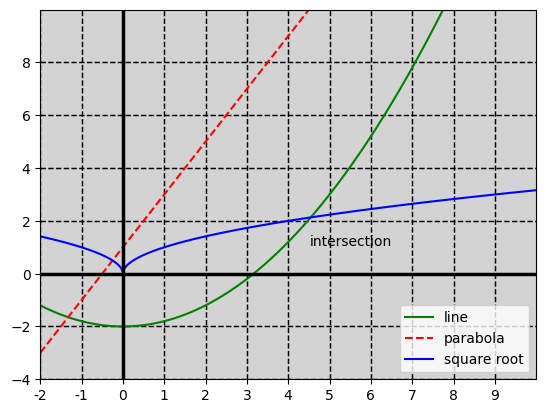

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(-2,10,1000)
df = pd.DataFrame({'x':x, 'b(x)': 0.2*x**2-2, 'c(x)': 2*x +1, 'd(x)': np.abs(x)**0.5})

# modifications for the functions, add labels, style and color
ax = df.plot(x='x', y='b(x)', label='line', color = 'green')
ax = df.plot(x='x', y='c(x)', label='parabola', ax=ax, ls = '--', color = 'red') # ax=ax so they print on same graph
ax = df.plot(x='x', y='d(x)', label='square root', ax=ax, color = 'blue')

ax.set_facecolor('lightgray') # set background color as light gray
plt.grid(color = 'black', ls = '--', lw = 1.05) # make grid dashed and black

# set limits for both axes
ax.set_ylim(-4, 10)
ax.set_xlim(-2, 10)

# change legend position
plt.legend(loc = "lower right")

# make the origin bold here
x_origin = ax.axhline(0, color='black', lw=1.5) # get the line object of the x-axis at the origin
y_origin = ax.axvline(0, color='black', lw=1.5) # same but with y
# set the line width
x_origin.set_linewidth(2.5)
y_origin.set_linewidth(2.5)

# calculate the x-coordinate of the intersection
y_intrs = 0.3 * x**2 - 2
x_intrs = np.interp(y_intrs, df['d(x)'], df['x'])
intersection = x_intrs[(x_intrs >= -2) & (x_intrs <= 10)].mean()

# add "intersection" at the intersection point
plt.annotate('intersection', (intersection, 0.2 * intersection**2 - 2), textcoords="offset points", 
             xytext=(6,-13), color='black')

# get rid of axis labels
plt.xlabel('')
plt.ylabel('')

# set the x-axis to go from -2 to 9 and show 10 without label
ax.set_xticks(np.arange(-2, 10, 1))
ax.set_xticklabels([i if i != 9.5 else "" for i in np.arange(-2, 10, 1)])

# set the y-axis to go from -4 to 8 and show 10 without labeled
ax.set_yticks(np.arange(-4, 10, 2))

plt.show()

## Problem 3. Weather subplots
[This file](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p03_weather.txt) has daily weather observations from Jyväskylä 2000-2021.

Prepare a figure with 4 subfigures representing:
* a line plot with daily snow depths 1st Jan to 28th Feb years 2018-2021. Make the x-axis show the day numbers (1-59) as in the model below. Replace -1 snow depth values with zero.
* a bar plot with maximum snow depths of each February 2000-2021. Write text "max" & max value above the highest bar.
* a [regplot](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial) with March (all years) day number and max air temperature
* a violinplot showing distribution on max and min temperatures from January days (all years) categorized with precipitation under 1 mm, 1-5 mm, over 5 mm

Model (colors etc may vary):  
![model](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p03_model.png)

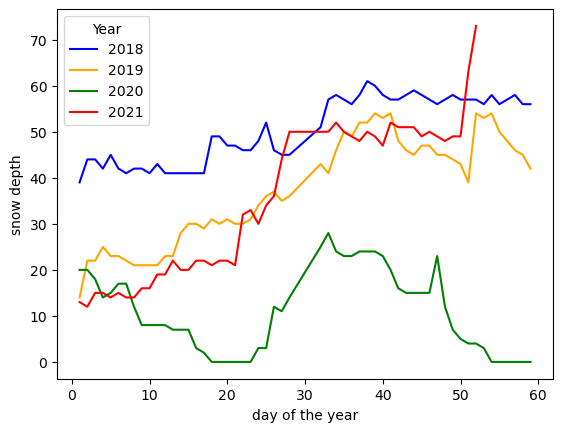

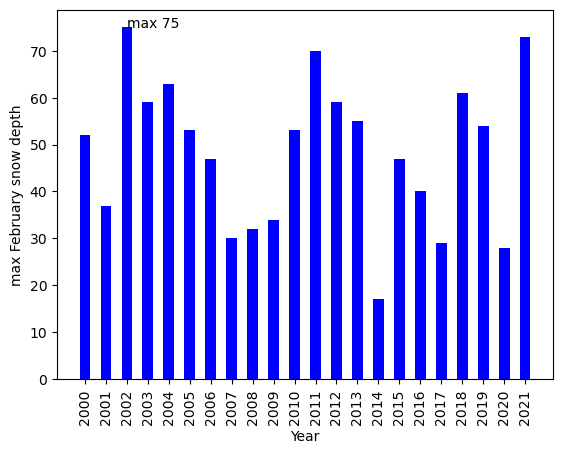

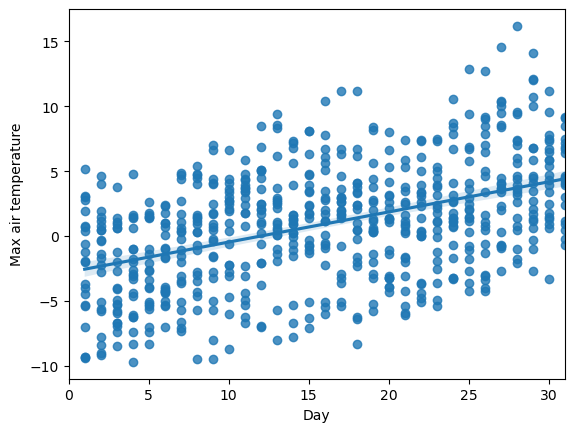

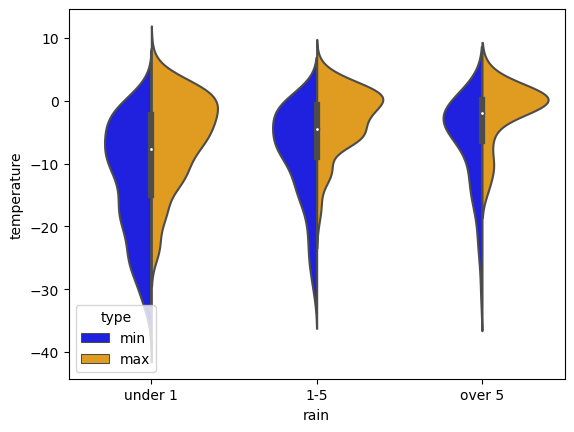

In [5]:
# FIRST GRAPH
import pandas as pd
import matplotlib.pyplot as plt

matsku = "https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p03_weather.txt"
df = pd.read_csv(matsku, sep=",")

# filter data for 1st Jan to 28th Feb of years 2018-2021
df = df[(df['Year'] >= 2018) & (df['Month'] <= 2) & (df['Day'] <= 28)]

# replace -1 snow depth values with 0
df['Snow depth (cm)'].replace(-1, 0, inplace=True)

# calculate the day number (1-59)
df['Day number'] = (df['Month'] - 1) * 31 + df['Day']

# plot the gaph for each year, give them labels and colors
plt.plot(df[df['Year'] == 2018]['Day number'], df[df['Year'] == 2018]['Snow depth (cm)'], color = 'blue', label='2018')
plt.plot(df[df['Year'] == 2019]['Day number'], df[df['Year'] == 2019]['Snow depth (cm)'], color = 'orange', label='2019')
plt.plot(df[df['Year'] == 2020]['Day number'], df[df['Year'] == 2020]['Snow depth (cm)'], color = 'green', label='2020')
plt.plot(df[df['Year'] == 2021]['Day number'], df[df['Year'] == 2021]['Snow depth (cm)'], color = 'red', label='2021')

# labels on axes and title for legend
plt.xlabel('day of the year')
plt.ylabel('snow depth')
plt.legend(title = 'Year')

plt.show()

#-----------------------------------------------------------------------------------
# SECOND GRAPH
import pandas as pd
import matplotlib.pyplot as plt

matsku = "https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p03_weather.txt"
df = pd.read_csv(matsku, sep=",")

# filter for february each year
df = df[(df['Month'] == 2) & (df['Year'] >= 2000) & (df['Year'] <= 2021)]

# group by year and get the max snow depth for each year
grouped = df.groupby('Year').max()

# plot the bar chart, give it color and width 
plt.bar(grouped.index, grouped['Snow depth (cm)'], color='blue', width=0.5)

# if the index at current iteration == index of the max of snow depth then the text is added to the plot
for i in range(len(grouped)):
    if grouped.index[i] == grouped['Snow depth (cm)'].idxmax():
        plt.text(grouped.index[i], grouped['Snow depth (cm)'].max(), 'max ' + str(int(grouped['Snow depth (cm)'].max())))

# axis labels
plt.xlabel('Year')
plt.ylabel('max February snow depth')
plt.xticks(grouped.index, rotation=90) # display all years on x-axis and rotate 90 degrees

plt.show()

#------------------------------------------------------------------------------------
# THIRD GRAPH
import pandas as pd
import seaborn as sns
import numpy as np

matsku = "https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p03_weather.txt"
df = pd.read_csv(matsku, sep=",")

# filter data for March of each year
df = df[(df['Month'] == 3) & (df['Year'] >= 2000) & (df['Year'] <= 2021)]

# add day number column
df['day_number'] = (df['Month'] - 1) * 0 + df['Day']

# plot the regplot, show scatter and the middle line
sns.regplot(x='day_number', y='Max air temperature', data=df, scatter=True, fit_reg=True)

# axis labels
plt.xlabel('Day')
plt.ylabel('Max air temperature')
# set x-axis limits
plt.xlim(0, 31)

plt.show()

#---------------------------------------------------------------------------------------
# FOURTH GRAPH
matsku = "https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p03_weather.txt"
df = pd.read_csv(matsku, sep=",")
df['Precipitation (mm)'] = pd.to_numeric(df['Precipitation (mm)'])

# function to categorize precipitation
def categorize_precipitation(x):
    if x < 1:
        return "under 1"
    elif x < 5:
        return "1-5"
    else:
        return "over 5"

# a new column with precipitation categories
df['precipitation_category'] = df['Precipitation (mm)'].apply(categorize_precipitation)

# new dataframe with just the relevant columns
cols = ['precipitation_category', 'Max air temperature', 'Min air temperature']
df_violin = df.loc[df['Month'] == 1, cols]

# melt the dataframe to have one column for temperature type (min or max)
df_violin = df_violin.melt(id_vars=['precipitation_category'], var_name='type', value_name='temperature')

# reverse the order of the hue levels to match the colors in harri's picture
order = ["Max air temperature", "Min air temperature"][::-1]

# create the violinplot
sns.violinplot(x='precipitation_category', y='temperature', hue='type', hue_order=order, split=True, data=df_violin, palette=["blue", "orange"])

# axis labels
plt.xlabel('rain')
plt.ylabel('temperature')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['min', 'max']
plt.legend(handles, labels, title='type', loc='lower left')

plt.show()

# Problem 4. Coefficient of Variation

[This file](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p04_machine.csv) has some computer log data with 10-second intervals. 

For each **hour** calculate the **coefficient of variation (CV)** which is defined as **the ratio of the standard deviation to the mean**. So:
- group the data by hours
- for each hour's data, calculate the cv (= std/mean).

Prepare a plot of the CV values showing **under which CV value is x % of CV values** as in the model image below. The x axis has 0-100 representing percentages and the y axis has the corresponding CV values. Limit the y axis to 0 ... 0.1.

Fill the lowest 20 % green and the largest 20 % red. Model:

![model4](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p04_model.png)

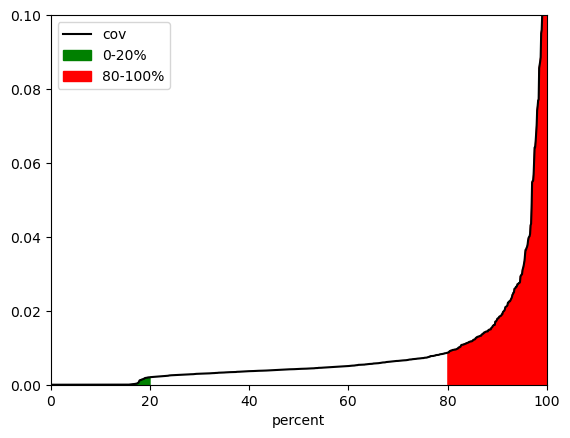

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv = "https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p04_machine.csv"
df = pd.read_csv(csv)

# make date and time to datetime column
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"])

# group the data by hour
df_hour = df.groupby(pd.Grouper(key="datetime", freq="H"))

# calculate CV for each hourly group
cv_hour = df_hour["value"].agg(lambda x: np.std(x) / np.mean(x))

# sort the CV values in ascending order
cv_hour_sorted = cv_hour.sort_values()

# calculate the percentage of CV values less than or equal to each value
percentages = np.linspace(0, 100, len(cv_hour_sorted))

# color the areas of the graph
eka = cv_hour.quantile(0.2)
toka = cv_hour.quantile(0.8)

# plot the CV values and color the area under the line
fig, ax = plt.subplots()
ax.plot(percentages, cv_hour_sorted, color="black", label="cov")
ax.fill_between(percentages, cv_hour_sorted, where=cv_hour_sorted <= eka, color="green", label="0-20%")
ax.fill_between(percentages, cv_hour_sorted, where=cv_hour_sorted >= toka, color="red", label="80-100%")

# set limits and x label for plot
ax.set_ylim(0, 0.1)
ax.set_xlim(0, 100)
ax.set_xlabel("percent")

# add labels for x tics
x_ticks = np.arange(0, 101, 20)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f"{t:.0f}" for t in x_ticks])

# create legend
ax.legend(loc="upper left")

plt.show()

## Problem 5. Opening Questionnaire Analysis.
- Analyze our opening questionnaire results in
 > **public/misc_stuff/opening_questionnaire_answers** :
    - read all the json files into a dataframe
    - produce some descriptive statistics
    - produce some charts.
- You have total freedom! Try to imagine that:
    - this data is from an important questionnaire
    - you need to present the results to your company CEO & executive board
    - you have chosen to use jupyter & pandas for the job.
- Try to keep things simple. No three-dimensional stuff please!
- The most elegant solution wins!

## Handin your final answers by running the code cell below.
- Save your latest changes first.
- Please remove anything that may identify you to your anonymous reviewer.
- You may run the code cell as many times as you wish.
- Your permission to write the handin file ends at the deadline.

In [7]:
import sys
sys.path.append('/home/varpha/data_analytics/lib')
from handin import handin_exrc_03
handin_exrc_03()


All the relevant .ipynb files in your current directory:

  1. exrc_03-Copy1.ipynb



Please input the order number (the one in the beginning of the line) of the file you want to hand in:  1



Your answers to the first exercises were handed in successfully. Thank you!
You may double check your handin by calling

    /home/varpha/data_analytics/bin/handin.sh

from the terminal prompt.
